### Analysis of factors that affect student's quality of academic performance

1- Age
2- Gender
3 - Geographical belongingness
4 - Ethnicity
5 - Marital status
6 - socioeconomic status (SES)
7 - parents’ education level
8 - parental profession
9 - language
10 - income
11 - religious affiliations


# Importação das bibliotecas

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import dask.dataframe as dd
from utils import load_parquets, info_sum_isna
from scipy.stats import ranksums
from scipy import stats

# Carregando os dados

### Dataset information:



In [71]:
year = 2018
path = f'../datasets/integrated_datas_{year}.parquet.gzip'
data = dd.read_parquet(path, ignore_metadata_file=True)

<!-- Testing normal distribution for grades for all Brazilian states to decide which statistical test would be suitable -->

In [72]:
# def ploting_distribution_female_male_per_state(state, course):
#     dataset_women = mulher_2020[mulher_2020['SG_UF_RESIDENCIA'] == state]
#     dataset_man = homem_2020[homem_2020['SG_UF_RESIDENCIA'] == state]
#     fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
#     ax1 = sns.histplot(dataset_women[course], ax=ax1).set(title="Math grades distribution 'W'", xlabel='Math grades W', ylabel='density')
#     ax2 = sns.histplot(dataset_man[course], ax=ax2).set(title="Math grades distribution 'M'",  xlabel='Math grades M', ylabel='density')
#     plt.show()

## Testes estatisticos para 3 variavies

### 1. Marital status

In [73]:
data.columns

Index(['NU_ANO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'TP_SES_INCOME',
       'TP_SES_POINTS'],
      dtype='object')

In [74]:
data['TP_ESTADO_CIVIL'].value_counts().compute()

0    3472320
1     253315
2      38114
3       4252
Name: TP_ESTADO_CIVIL, dtype: int64

In [75]:
def replace_status(value):
    if value == 1:
        return "Single"
    elif value == 2:
        return "Married"
    elif value == 3:
        return "Divorced/Separated"

In [76]:
data['TP_ESTADO_CIVIL'] = data.TP_ESTADO_CIVIL.apply(replace_status, meta=('TP_ESTADO_CIVIL', 'object'))


In [77]:
data['TP_ESTADO_CIVIL'].value_counts().compute()

Single                253315
Married                38114
Divorced/Separated      4252
Name: TP_ESTADO_CIVIL, dtype: int64

In [78]:
# def replace_status(value):
#     if value == 1:
#         return "Single"
#     elif value == 2:
#         return "Married"
#     elif value == 3:
#         return "Divorced/Separated"

# data['TP_ESTADO_CIVIL'] = data.TP_ESTADO_CIVIL.apply(replace_status, meta=('TP_ESTADO_CIVIL', 'object'))

In [79]:
single = data[(data['TP_ESTADO_CIVIL'] == 'Single')]
married = data[(data['TP_ESTADO_CIVIL'] == 'Married')]
divorced = data[(data['TP_ESTADO_CIVIL'] == 'Divorced/Separated')]
# yellow = data[(data['TP_ESTADO_CIVIL'] == 'Yellow')]

In [80]:
single

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SES_INCOME,TP_SES_POINTS
npartitions=102,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int16,object,object,int16,object,int16,int16,int16,object,int16,int16,int16,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,int16,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [81]:
def has_normal_distribution(dataset, course):
    k2, p = stats.normaltest(dataset[course])
    alpha = 0.05
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        # print("The null hypothesis can be rejected")
        return False
    else:
        print("The null hypothesis cannot be rejected")
        return True

In [82]:
states = list(data['SG_UF_RESIDENCIA'].unique())

In [83]:
has_normal_distribution(single[single['SG_UF_RESIDENCIA'] == 'PB'], 'NU_NOTA_MT')

p = 1.17972e-215


False

In [84]:
def testing_normal_distribution_all_states(course):
    number_of_normal_distributions = 0
    for state in states:
        single_state = single[single['SG_UF_RESIDENCIA'] == state]
        married_state = married[married['SG_UF_RESIDENCIA'] == state]
        divorced_state = divorced[divorced['SG_UF_RESIDENCIA'] == state]
        # indigenous_state = indigenous[indigenous['SG_UF_RESIDENCIA'] == state]
        # brown_state = brown[brown['SG_UF_RESIDENCIA'] == state]
        result_single_dist = has_normal_distribution(single_state, 'NU_NOTA_MT')
        result_married_dist = has_normal_distribution(married_state, 'NU_NOTA_MT')
        result_divorced_dist = has_normal_distribution(divorced_state, 'NU_NOTA_MT')
        # result_indigenous_dist = has_normal_distribution(indigenous_state, 'NU_NOTA_MT')
        # result_white_dist = has_normal_distribution(white_state, 'NU_NOTA_MT')
        if (result_single_dist | result_married_dist | result_divorced_dist):
            print(state)
            number_of_normal_distributions+= 1
            print('normal distribution')
    return number_of_normal_distributions


In [86]:
testing_normal_distribution_all_states('NU_NOTA_MT')

p = 2.38248e-206
p = 2.05026e-20
p = 2.44449e-05
p = 1.17972e-215
p = 2.65071e-37
p = 1.55149e-08
p = 1.85598e-198
p = 1.52027e-32
p = 0.000426226
p = 1.74565e-259
p = 5.8982e-35
p = 7.32715e-08
p = 2.79921e-139
p = 4.19994e-13
p = 0.000625345
p = 3.35262e-53
p = 7.74264e-09
p = 0.139022
The null hypothesis cannot be rejected
TO
normal distribution
p = 0
p = 1.10985e-85
p = 4.8694e-17
p = 0
p = 6.12027e-81
p = 1.31379e-13
p = 2.37539e-122
p = 1.71877e-19
p = 0.000450737
p = 2.29747e-127
p = 5.72488e-20
p = 9.67101e-06
p = 7.57678e-109
p = 2.36743e-30
p = 1.40163e-07
p = 2.00474e-110
p = 4.32062e-22
p = 4.30772e-06
p = 0
p = 6.017e-59
p = 4.99043e-14
p = 1.51651e-104
p = 4.27986e-15
p = 0.00157312
p = 0
p = 1.54755e-64
p = 1.273e-14
p = 0
p = 5.34993e-39
p = 1.24003e-09
p = 2.64559e-96
p = 1.72211e-22
p = 2.55713e-05
p = 2.15853e-79
p = 3.21767e-15
p = 2.06632e-05
p = 2.59529e-32
p = 1.21769e-09
p = 0.0273899
p = 2.70506e-99
p = 6.57896e-27
p = 4.60646e-08
p = 0
p = 2.52155e-41
p = 9.63

/Users/chrystinne/.pyenv/versions/3.9.4/envs/venem/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


p = 0.517687
The null hypothesis cannot be rejected
RR
normal distribution
p = 1.73498e-189
p = 1.45729e-33
p = 3.96705e-06
p = 5.73165e-145
p = 2.2325e-25
p = 1.43655e-05
p = 1.91545e-118
p = 1.00929e-16
p = 0.00100055
p = 4.25681e-39
p = 5.49179e-07
p = 0.228886
The null hypothesis cannot be rejected
AP
normal distribution
p = 3.55427e-61
p = 1.01534e-07
p = 0.107176
The null hypothesis cannot be rejected
AC
normal distribution


4

In [87]:
def perform_Kruskal_Wallis_per_state(state, course):
   teste = stats.kruskal(single[single['SG_UF_RESIDENCIA'] == state][course], married[married['SG_UF_RESIDENCIA'] == state][course], divorced[divorced['SG_UF_RESIDENCIA'] == state][course])
   return teste

In [88]:
print(perform_Kruskal_Wallis_per_state('PB', 'NU_NOTA_MT'))

KruskalResult(statistic=60.78770572813431, pvalue=6.31127955349761e-14)


In [89]:
print(perform_Kruskal_Wallis_per_state('RN', 'NU_NOTA_LC'))

KruskalResult(statistic=24.222255641054605, pvalue=5.4979909156286584e-06)


In [90]:
print(perform_Kruskal_Wallis_per_state('PB', 'NU_NOTA_CN'))

KruskalResult(statistic=10.328707874209451, pvalue=0.005716755029486496)


Interpreting the results:

The Kruskal-Wallis Test uses the following null and alternative hypotheses:

The null hypothesis (H0): The median score in math is equal across all ethnicty groups.

The alternative hypothesis: (Ha): The median score in math is not equal across all ethnicty groups.

In this case, the test statistic is 7749.868515864906 and the corresponding p-value is 0.0. Since this p-value is less than 0.05, we can reject the null hypothesis that the median score in math is the same for all five ethnicity groups. We have sufficient evidence to conclude that the ethnicity leads to statistically significant differences in median scores in math for the ENEM exam.

In [91]:
def ploting_distribution_marital_status_per_state(state, course):
    single_state = single[single['SG_UF_RESIDENCIA'] == state]
    married_state = married[married['SG_UF_RESIDENCIA'] == state]
    divorced_state = divorced[divorced['SG_UF_RESIDENCIA'] == state]
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, sharey=True)
    ax1 = sns.histplot(single_state[course], ax=ax1).set(title="Single", xlabel='Single', ylabel='density')
    ax2 = sns.histplot(married_state[course], ax=ax2).set(title="Married",  xlabel='Married', ylabel='density')
    ax3 = sns.histplot(divorced_state[course], ax=ax3).set(title="Divorced", xlabel='Divorced', ylabel='density')
    plt.show()

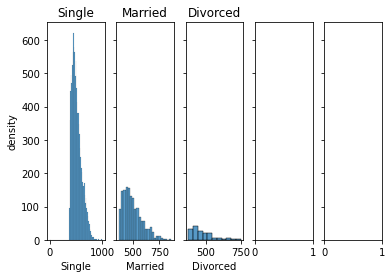

In [92]:
ploting_distribution_marital_status_per_state('PB', 'NU_NOTA_MT')